<a href="https://colab.research.google.com/github/leejunho12316/HonGongMachine/blob/main/4_2_%ED%99%95%EB%A5%A0%EC%A0%81_%EA%B2%BD%EC%82%AC_%ED%95%98%EA%B0%95%EB%B2%95_%EB%B3%B5%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
fish = pd.read_csv("https://bit.ly/fish_csv_data")

데이터전처리


In [5]:
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

In [6]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state = 42)

In [7]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)

train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

경사하강법 사용하는 모델

In [37]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss = 'log_loss', max_iter = 1, random_state = 42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target), sc.score(test_scaled, test_target))


0.5294117647058824 0.65


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [48]:
import numpy as np

sc = SGDClassifier(loss = 'log_loss', random_state = 42, max_iter = 1)
train_score = []
test_score = []

sc.fit(train_scaled, train_target)
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


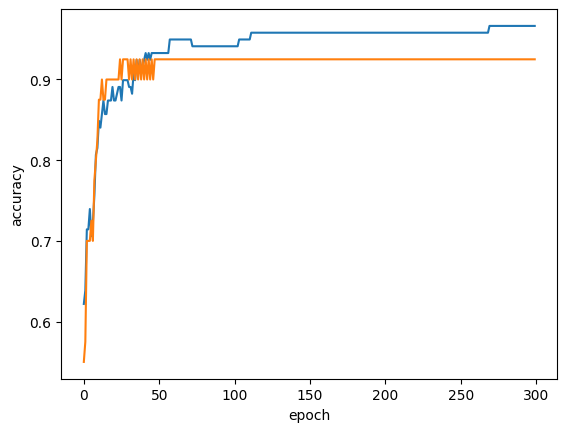

In [49]:
import matplotlib.pyplot as plt
plt.plot(train_score)
plt.plot(test_score)

plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()